# **Inequality in NYC**

New York City consists of five boroughs: Manhattan, Queens, The Bronx, Brooklyn, and Staten Island. While New York City is known for wealth, booming industries, and job opportunities, there are also many individuals in many areas that struggle to live. According to The Center of [New York City Affairs](http://www.centernyc.org/inequality-poverty), approximately one in five New Yorkers lives in poverty and nearly half the city’s households are considered near poor.

In our report, we looked at data regarding housing, demographics, and education to analyze the intersections that produce inequality. Our data analysis shows that inequalities within New York City may be correlated with both race and location of residence (borough). How did these trends come about?

Redlining, which began in the 1930s, refers to the racially discriminatory practice of denying home loans to borrowers in communities of color and poor communities based on perceived financial risk. Although redlining is no longer enforced, New York City has not escaped its pervasive history, as many neighborhoods that were affected still face economic and social hardship.

Our data shows that race still has a relationship with location of residence and subsequently, economic and educational inequalities. Through data analysis, a pattern emerges that indicates boroughs with higher levels racial minorities also tend to have a higher percent of rent burden and poverty, Furthermore, schools with a higher percentage of minorities tend to have a higher number of students living in poverty, and that there is a positive correlation between a higher percent of Black and Hispanic students and low income housing. These findings are important because these inequalities can arise from deeper systematic issues such as redlining and white flight within different boroughs and neighborhoods in New York City. 

## **Research Questions**
- How does housing accessibility and rent burden differ across New York City's boroughs?
- How does housing policy and inequality extend to educational inequality in New York City?
- To what extent does racial and socioeconomic segregation in New York City shape its student's educational opportunities and outcomes?

In our project, we chose to look at multiple datasets to see these varying trends and answer different parts of our questions.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

## **Data Description and Limitations**

### Dataset One: [Housing](https://data.cityofnewyork.us/City-Government/Demographics-and-profiles-at-the-Neighborhood-Tabu/hyuz-tij8)

##### Description
* The original dataset had different rows be the housing characteristics from rent, household type, rent burden, etc… and the columns were the different neighborhoods. The cleaned data set had the rows be the percent burden of rent and the columns be the five boroughs in NYC.
* This dataset was created as a part of an initiative to increase transparency, accessibility, and accountability of the City government.
* According to their website, NYC Open Data makes the wealth of public data generated by various New York City agencies and other City organizations available for public use. It is funded by the New York City government. This specific dataset was provided by the Department of City Planning.
* Many different politics/policies in NYC affect what type of data is collected. There are many different reasons why these estimates might not be an accurate representation of differences across boroughs including homelessness, lack of documentation, people over or underreporting their income, etc… 
* We dropped rows of unnecessary housing data that did not look at the rent burden. We also dropped unnecessary neighborhoods that had missing values such as the Staten Island Cemetery. We further cleaned the data by only looking at the median estimates by borough, and median percent estimates by borough and dropped all other columns.
* Since this is not personalized data, the people involved might not be fully aware that their data is being used and collected. However, since it is in aggregate form there should be no privacy or expectation concerns.
* The raw dataset can be found [here](https://drive.google.com/file/d/1mL4DjAYRaL2f184_WdoQd-u0ETNvYvgU/view?usp=sharing).

##### Limitiations
* This data shows five year estimates from 2008-2012, so we don't get a glimpse of what is happening year to year and how the rent burden is changing for each district -- it might be getting better or worse for some districts and we cannot exactly tell from the data. Furthermore, this data is quite old and does not take into acccount recent political events and policies that likely have afffected housing policy in NYC.

### Dataset Two: [Poverty](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/hveh-vctc).
##### Description
* The original dataset is fairly simple - it lists the poverty rate of each community district in NYC and also has rows for a summary of each f the boroughs.
* This dataset comes from NYC Open Data as well, as a part of an initiative to increase transparency, accessibility, and accountability of the City government and made possible through funding by the NYC government. This specific dataset came from the Mayor's Office for Econnomic Opportunity.
* Many different politics/policies in NYC affect what type of data is collected. There are many different reasons why these estimates might not be an accurate representation of differences across boroughs including homelessness, lack of documentation, people over or underreporting their income, etc… 
* To clean this dataset, we dropped the summary rows, created a new column to indicate what overall borough the community district was in, convert the percentages to floats for calculations, and sorted it alphabetically by community district.
* The NYCgov poverty rate is measured in a different way than the overall US poverty rate. According to their [website](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/poverty-measure.page), the measure includes a threshold that accounts for the higher cost of housing in New York City and incorporates the value of programs intended to alleviate poverty; adjusting family incomes for benefits such as the Supplemental Nutritional Assistance Program (SNAP) and the Earned Income Tax Credit.
* Since this data is aggregated, there should be no privacy or expectation concerns for the individual.
* The raw dataset can be found [here](https://drive.google.com/file/d/1O_JcvgjGhp79fMZrFzXZX3dnw3ZlMXKL/view?usp=sharing).

##### Limitations
* This poverty measure only looks at a specific point in time - 2018 - so we cannot see how poverty levels have changed over time for the community districts which would definitely have an impact on our overall analysis.

### Dataset Three: [Population](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2)
##### Description
* The orginal dataset looked at population levels across community districts at different points in time -- 1970, 1980, 1990, 2000, and 2010, collected Census Bureaus' Decennial data dissemination. We cleaned our data to only look at the most recent measure of population (2010), that better aligns with our times of our other datasets.
* We had to create a new column that combined distict and community number to be able to merge with our other datsets.
* The data was provided by the Department of City Planning is owned by NYC Open Data.
* We used this data to provide a magnitude measurement for our levels of poverty and rent burden, so we have a better understanding of how many people are affected across districts since popoulation levels vary. 
* This data is not personalized and does not provide any sensitive information so there should be no privacy concerns.
* The raw dataset can be found [here](https://drive.google.com/file/d/1T_HYEXvHoydxVDyuijdM2dSu0P1zM-lZ/view?usp=sharing).

##### Limitations
* This measure of population is perpetually changing and being a decade old, is not an extremely accurate measure of population levels right now. However, it does align with our other datasets so it gives us a good look into the general trend.
* Census data itself always has its limitations -- people being missed, double reported, inaccurate responses. There is no way to completely know.

### Dataset Four: Student Temp Housing
##### Data Description
* For the finalized dataset for housing and education data, we combined two datasets. The rows represent different boroughs and school districts within New York City. The columns make up different demographics, including percentage of Asian, Black, Hispanic, White, and other races, along with percentage of students in poverty. Additionally, they show the total number of students at each public school regardless of housing situation, students residing in shelter, the number and percent of students in temporary housing. 
* Poverty is measured by students who qualify for a free or reduced price lunch program or those eligible for Human Resources Administration benefits. Students in temporary housing are defined as any student 21 or younger enrolled in school and experiencing housing instability at any point during the school year. Temporary housing includes sharing the housing of others, in shelter, in hotel/motel, or in other temporary housing. The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. In 2017-18, there were 105,261 students residing in temporary housing at any point throughout the school year.  
* The total numbers of students and students in temporary housing are disaggregated by school, based on the last school or program a student attended. 
* The final, revised dataset was created in order to study relationships between districts and specific demographics in order to find insights into poverty levels and temporary housing numbers within the districts. 
* The data was collected using multiple data sources, including the DOE's Audited Register, biographic data from the Automate the Schools (ATS) system, and the Location Code Generation and Management System (LCGMS), and the Department of Homeless Services (DHS). Due to the occasional missing demographic data and long-term-absent students not being accounted for, some of the enrollment numbers do not add up. The people surveyed (students within New York City) are probably aware that their demographic and free lunch status is recorded but this information does not affect the data. 
* The original data set can be found [here](https://drive.google.com/drive/folders/1B8daIcWqa5voZ6YwI-Jy1ZA4WMcZJdzW?usp=sharing).

##### Data Limitations
* One significant limitation within the dataset is that only public schools are accounted for (tne school data accounts for charter schools while the housing data does not). The absense of private schools in the dataset results in inflated poverty, racial minority percentages, and housing data for each district as private schools historically account for a higher level of wealthier and white students due to the tuition and prep needed to admitted.
* Regarding the housing data, The Federal McKinney-Vento Homeless Assistance Act requires school districts to ask families to report on their housing situation. Schools are only required to provide the survey when they are aware that there is a change in address so there may be instances where schools have outdated information. Additionally, families might lie about the state of housing in their families in the questionnaires as they do not want schools prying into their family situation so as a result, the actual temporary housing numbers might be lower than they actually are. 

## **Analysis**

Inequality is rampant in New York City. Under the shadows of skyscrapers, tourism, and economic boom, many households struggle to keep up with high rent prices an. In our project we explore the disparities in housing insecurity/rent burden and education across New York City's five boroughs.

In our final report, we vow to present the following analyses:

#### Analysis One:
We will plot rent burden (defined as paying >30% income level) by rent level for different neighborhoods grouped by borough to analyze if there is an association between rent level and rent burden. Especically given the economic downturn, we want to look at how housing insecurity has been exacerbated, especially for those already living in low income areas.


#### Analysis Two: 
We will look at the type of relationship and correlation between rent burden and minority levels for each of the community districts and determine if there are any statistical differences.

#### Analysis Three:

We will analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity may change based on race. 
We looked at a line plot that compared our average rent burden percents by borough.


### **Analysis One**
First, we look at how rent burden differs across different boroughs.

In [1]:
rent_burden_percent = pd.read_csv("rent_burden_percent.csv")
burden_gross = pd.read_csv("burden_gross.csv")

# subset to only include average borough columns
rent_burden_percent = rent_burden_percent[['brooklyn', 'bronx', 'manhattan', 'queens', 'staten']] 
# display(rent_burden_percent)

rent_burden_percent.plot.line()
plt.xlabel("Percent Rent Burdened")
plt.ylabel("Percent of Households")
plt.title('Rent Burden by Borough')
plt.show()

NameError: name 'pd' is not defined


In this cleaned dataset, we see the median percent of households that are under each division of rent burden by each borough in New York City. Across all boroughs, residents spend a very large amount of their income on rent. 

While the differences in rent burden between boroughs do not seem that jarring, one large difference is what we see residents in the Bronx pay as a percent of their income vs residents in Manhattan. The percentage of residents that spend more than 35% of their income on living is nearly 50%, while the percent of residents that pay the same income burden on rent in Manhattan is only 35%. If we were also to compare [poverty levels](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/data-tool.page) from the same time end - 2012, we see that Staten Island held the lowest poverty level at 13.4%, Manhattan the second lowest at 14.7%, Queens at 21.8%, Brooklyn at 22.3%, and the Bronx at 25.2%. 

The comparisons between poverty and income show us that in neighborhoods that face higher poverty levels, they may actually be more burdened by rent than their wealthier counterparts. This demonstrates a discrepancy in the quality of life and wealth that can be accumulated across boroughs.

Next, we look at how rent burden changes based on rent level, specifically based on percentage of households paying low rent. 

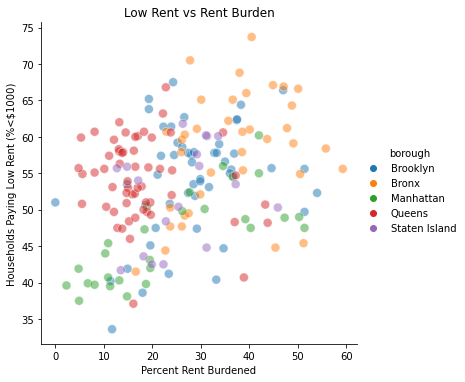

In [51]:
# display(burden_gross.head())

sns.relplot(x='low_rent', y='rent_burdened', hue="borough", s=80, alpha=.5, data=burden_gross);
plt.xlabel("Percent Rent Burdened")
plt.ylabel("Households Paying Low Rent (%<$1000)")
plt.title('Low Rent vs Rent Burden')
plt.show()

In the scatterplot, we can see that there seems to be no overall correlation, but there is significant variation between the different boroughs. We then used a multivariable linear regression to calculate the regression slope of percentage of households paying low rent vs percentage of households facing rent burden, taking borough into account.

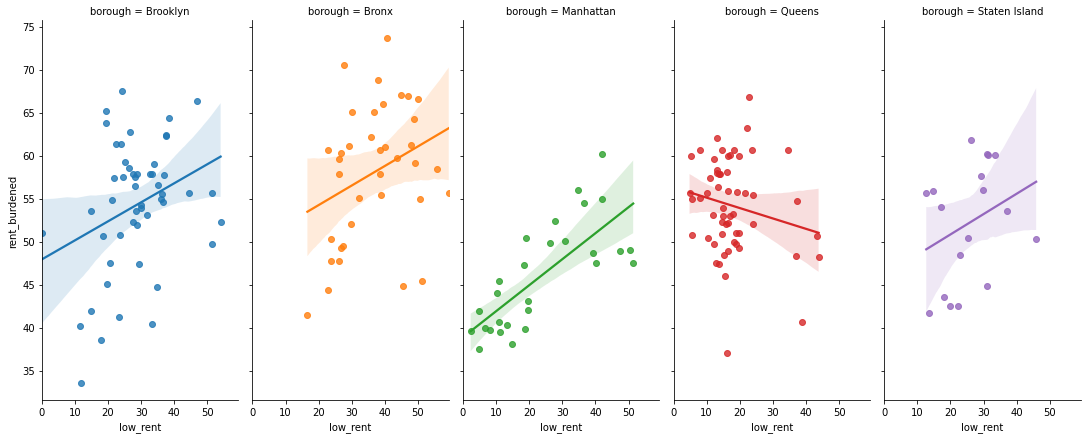

Low Rent Coefficient: 0.18


In [52]:
# display(burden_gross.head())

sns.lmplot(x='low_rent', y='rent_burdened', hue ='borough',col='borough',
               data=burden_gross, height=6, aspect=.5)

# sns.lmplot(x='low_rent', y='rent_burdened', hue='borough', data=burden_gross)
# plt.xlabel("Percent Rent Burdened")
# plt.ylabel("Households Paying Low Rent (%<$1000)")
# plt.title('Percentage of Low Renters that are Rent Burdened')
plt.show()

# indicator variables
burden_gross = burden_gross.copy()
burden_gross['is_brooklyn'] = pd.get_dummies(burden_gross['borough'])['Brooklyn']
burden_gross['is_bronx'] = pd.get_dummies(burden_gross['borough'])['Bronx']
burden_gross['is_manhattan'] = pd.get_dummies(burden_gross['borough'])['Manhattan']
burden_gross['is_queens'] = pd.get_dummies(burden_gross['borough'])['Queens']
burden_gross['is_staten'] = pd.get_dummies(burden_gross['borough'])['Staten Island']

# mutlivariable linear regression

multi_model = LinearRegression()
multi_model.fit(burden_gross[['low_rent','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], burden_gross['rent_burdened'])

print('Low Rent Coefficient:', round(multi_model.coef_[0],2))

Our multivariable linear regression model shows that there is a slight positive linear correlation between paying low rennt and being rent burdened across the different boroughs.

We wanted to further our findings from this analysis and look at rent burden based on demographics for each of the boroughs and indicate the population level as well corresponding with the size of the points.

### **Analysis Two**: 
We will look at the type of relationship and correlation between rent burden and percentage of minorities for each of the community districts and determine if minority levels in an area can predict rent burden.

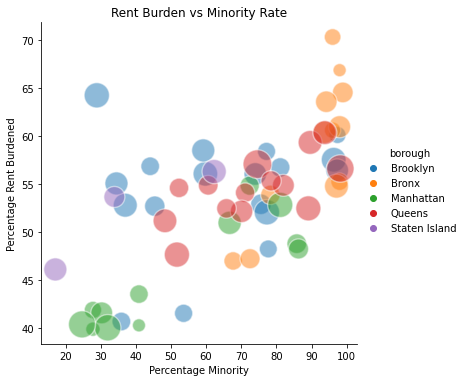

In [30]:
size = housing_poverty['population'].to_numpy()
sns.relplot(x='minority_rate', y='rent_burdened', hue="borough", s = size/300, alpha=.5, data=housing_poverty)
plt.xlabel("Percentage Minority")
plt.ylabel("Percentage Rent Burdened")
plt.title('Rent Burden vs Minority Rate')
plt.show()


In [31]:
import statsmodels.api as sm

X = housing_poverty['minority_rate']
Y = housing_poverty['rent_burdened']

#ANOVA model 
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          rent_burdened   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              722.9
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                    1.95e-34
Time:                        22:08:59   Log-Likelihood:                         -242.11
No. Observations:                  59   AIC:                                      486.2
Df Residuals:                      58   BIC:                                      488.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
minority_rate     0.7193      0.027     26.887      0.000       0.666       0.773
==============================================================================
Omnibus:                        4.156   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                4.075
Skew:                           0.616   Prob(JB):                        0.130
Kurtosis:                       2.628   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our visualization and regression scores, we see that there is a positive linear correlation between percentage of minorities and percentage rent burdened across the different boroughs.

### **Analysis Three**:

We will analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity may change based on race. 
We looked at a line plot that compared our average rent burden percents by borough.

#### Mean values for Columns

In [53]:
final_ds = pd.read_csv("final_ds.csv")

print("Correlation between Asian and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[6], final_ds.corr().unstack()[7]))
print("Correlation between Black and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[14], final_ds.corr().unstack()[15]))
print("Correlation between Hispanic and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[22], final_ds.corr().unstack()[23]))
print("Correlation between White and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[30], final_ds.corr().unstack()[31]))

Correlation between Asian and % of students in temporary housing is 0.32 and students in shelters is -0.48
Correlation between Black and % of students in temporary housing is -0.53 and students in shelters is 0.26
Correlation between Hispanic and % of students in temporary housing is -0.48 and students in shelters is 0.33
Correlation between White and % of students in temporary housing is 1.00 and students in shelters is -0.31


From these numbers, there is a correlation between race and students residing in temporary housing/residing in shelters. This shows a positive correlation with percentage of Black and Hispanic students with residing in temporary housing or in shelters. There was a negative correlation between the percentage of White and Asian students with residing in temporary housing or in shelters. 

*Null hypothesis*: There is no correlation between racial composition of schools and housing insecurity.

*Alternative hypothesis*: There is a correlation between ractial composition of schools and housing insecrurity. Aka some races will show greater housing insecurity compared to other races

In [33]:
x = final_ds[["%_black", "%_hispanic", "%_asian", "%_white"]]
y = final_ds["%_students_in_temporary_housing"]

#ANOVA model 
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     %_students_in_temporary_housing   R-squared (uncentered):                   0.956
Model:                                         OLS   Adj. R-squared (uncentered):              0.951
Method:                              Least Squares   F-statistic:                              196.5
Date:                             Wed, 28 Apr 2021   Prob (F-statistic):                    6.42e-24
Time:                                     22:08:59   Log-Likelihood:                         -96.005
No. Observations:                               40   AIC:                                      200.0
Df Residuals:                                   36   BIC:                                      206.8
Df Model:                                        4                                                  
Covariance Type:                         nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
%_black        0.1442      0.015      9.908      0.000       0.115       0.174
%_hispanic     0.1983      0.014     14.063      0.000       0.170       0.227
%_asian       -0.0053      0.038     -0.139      0.890      -0.082       0.072
%_white       -0.1023      0.042     -2.416      0.021      -0.188      -0.016
==============================================================================
Omnibus:                        1.841   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.259
Skew:                           0.162   Prob(JB):                        0.533
Kurtosis:                       2.193   Cond. No.                         6.44
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print("The mean Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].mean()))
print("The std of Asian enrollment percentage is {:.2f}".format(final_ds["%_asian"].std()))
print("\n")

print("The mean Black enrollment percentage is {:.2f}".format(final_ds["%_black"].mean()))
print("The std of Black enrollment percentage is {:.2f}".format(final_ds["%_black"].std()))
print("\n")

print("The mean Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].mean()))
print("The std of Hispanic enrollment percentage is {:.2f}".format(final_ds["%_hispanic"].std()))
print("\n")

print("The mean White enrollment percentage is {:.2f}".format(final_ds["%_white"].mean()))
print("The std of White enrollment percentage is {:.2f}".format(final_ds["%_white"].std()))
print("\n")

print("The mean poverty percentage is {:.2f}".format(final_ds["%_poverty"].mean()))
print("The std of poverty percentage is {:.2f}".format(final_ds["%_poverty"].std()))
print("\n")

The mean Asian enrollment percentage is 11.10
The std of Asian enrollment percentage is 12.67


The mean Black enrollment percentage is 33.49
The std of Black enrollment percentage is 21.87


The mean Hispanic enrollment percentage is 41.00
The std of Hispanic enrollment percentage is 19.89


The mean White enrollment percentage is 12.20
The std of White enrollment percentage is 10.91


The mean poverty percentage is 75.64
The std of poverty percentage is 11.16




#### Scatter Plots and Correlation between Race and Percent in Poverty

The correlation is -0.66


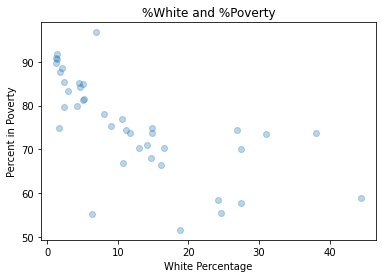

In [35]:
print("The correlation is {:.2f}".format(final_ds["%_white"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_white"],final_ds["%_poverty"],alpha = 0.3)
plt.title("%White and %Poverty")
plt.xlabel("White Percentage")
plt.ylabel("Percent in Poverty")
plt.show()

The correlation is -0.53


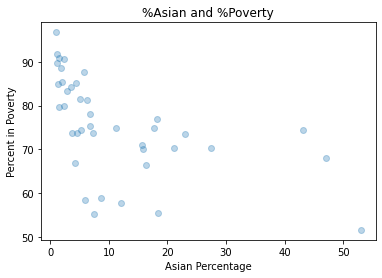

In [36]:
print("The correlation is {:.2f}".format(final_ds["%_asian"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_asian"],final_ds["%_poverty"],alpha = 0.3)
plt.title("%Asian and %Poverty")
plt.xlabel("Asian Percentage")
plt.ylabel("Percent in Poverty")
plt.show()

The correlation is 0.37


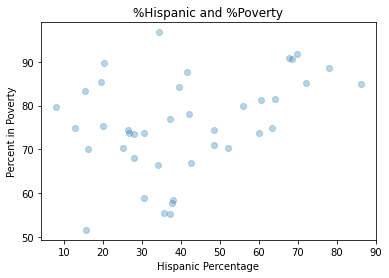

In [37]:
print("The correlation is {:.2f}".format(final_ds["%_hispanic"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_hispanic"],final_ds["%_poverty"],alpha = 0.3)
plt.title("%Hispanic and %Poverty")
plt.xlabel("Hispanic Percentage")
plt.ylabel("Percent in Poverty")
plt.show()

The correlation is 0.33


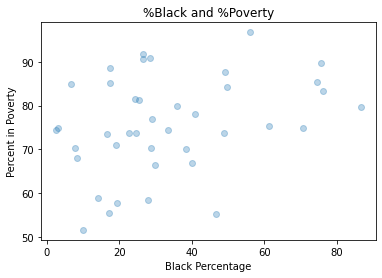

In [38]:
print("The correlation is {:.2f}".format(final_ds["%_black"].corr(final_ds["%_poverty"])))
plt.scatter(final_ds["%_black"],final_ds["%_poverty"],alpha = 0.3)
plt.title("%Black and %Poverty")
plt.xlabel("Black Percentage")
plt.ylabel("Percent in Poverty")
plt.show()

#### Relationship betwen mean student population and percent of unhoused students in each district per borough in scatterplots
The following scatterplots groups the dataframe by borough to show the relationship between mean student population and percent of students unhoused. Each point in the scatter plot is a district within the borough. We also found the correlation between both variables to see if student population size correlates with unhoused students. Each borough has their own scatter plot.

The correlation is 0.26


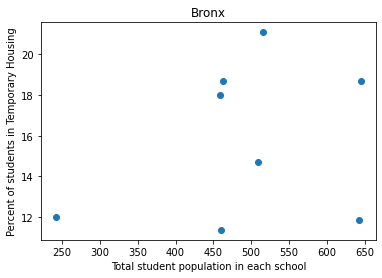

In [39]:
by_bronx = final_ds.loc[final_ds["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_bronx["#_total_students"].corr(le_bronx["%_students_in_temporary_housing"])))

plt.scatter(le_bronx["#_total_students"], le_bronx["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Bronx")
plt.show()

The correlation is -0.73


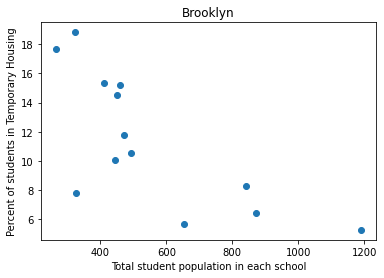

In [40]:
by_brooklyn = final_ds.loc[final_ds["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").mean()

print("The correlation is {:.2f}".format(le_brooklyn["#_total_students"].corr(le_brooklyn["%_students_in_temporary_housing"])))


plt.scatter(le_brooklyn["#_total_students"], le_brooklyn["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Brooklyn")
plt.show()


The correlation is 0.08


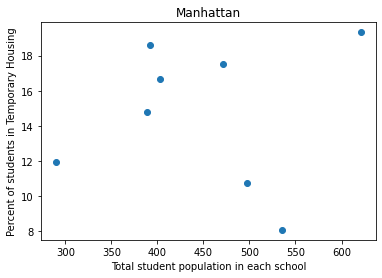

In [41]:
by_manhattan = final_ds.loc[final_ds["borough"] == "Manhattan"]
le_manhattan = by_manhattan.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_manhattan["#_total_students"].corr(le_manhattan["%_students_in_temporary_housing"])))

plt.scatter(le_manhattan["#_total_students"], le_manhattan["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Manhattan")
plt.show()

The correlation is 0.81


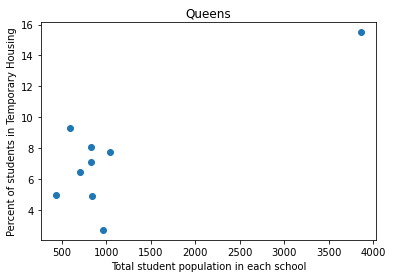

In [42]:
by_queens = final_ds.loc[final_ds["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").mean()
print("The correlation is {:.2f}".format(le_queens["#_total_students"].corr(le_queens["%_students_in_temporary_housing"])))
plt.scatter(le_queens["#_total_students"], le_queens["%_students_in_temporary_housing"])#, labels = "borough_and_district_#")
plt.xlabel("Total student population in each school")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Queens")
plt.show()

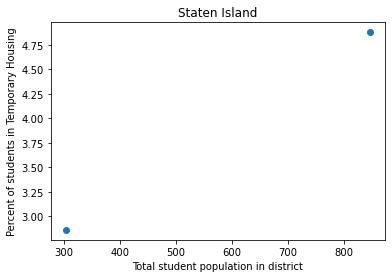

In [43]:
by_SI = final_ds.loc[final_ds["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").sum()
plt.scatter(le_SI["#_total_students"], le_SI["%_students_in_temporary_housing"])
plt.xlabel("Total student population in district")
plt.ylabel("Percent of students in Temporary Housing")
plt.title("Staten Island")
plt.show()

## Conlusion

The results of these analyses have pointed out the inequalities that lie within the booming city of New York. Data analysis has shown that inequalities within this city may be correlated with both race and location of residence (borough). These inequalities are likely to be a product of deeper systematic issues such as redlining and white flight that have caused multigenerational impacts. 

Through data analysis it can be seen that race is a likely determinant of access to education and housing. For example, there is a weak positive correlation between the percent of Black students living in temporary housing and in shelters with the correlation coefficient being 0.3 and 0.23 respectfully. Moreover, there is another positive correlation between the percent of Hispanic students and the percent of students living in temporary housing with a correlation coefficient of 0.5.  On the other hand, there is a negative correlation between the percent of White students and those who live-in low-income housing. There is a strong negative correlation between percent of White students and those who live in temporary housing with a correlation coefficient of -0.76 and a weak negative correlation with percent of White students and those in shelters with a correlation coefficient of -0.31. This can be further exacerbated when comparing the racial breakdown of a school to the percent of students living poverty there. In schools that have a low percentage of White or Asian students there is also a high percentage of students living in poverty. In a school that has almost no white students (0%-5%) there is between 80%-90% of students living in poverty with a correlation coefficient between the two variables being -0.66. The schools with a small percent of Asian students there have an even larger percent of students living in poverty with some communities having well over 90% of students living in poverty. These two variables are negatively correlated with a correlation coefficient of -0.53.

These findings conclude that racial composition of a school can have an impact on the educational outcomes of the school as there is less circular monetary flow in these areas. The schools who have a lower percentage of White and Asian students tend to have higher levels of poverty, which causes a lower school budget and access to less resources. This can have a multigenerational effect on Black and Hispanic families that don't have access to proper high school education and not as many resources to further their education in college. This issue perpetuates through generations causing greater economic disparity that can be seen through larger amounts of Black and Hispanic students living in poverty. This issue disportionately affecting Black and Hispanic families is not a coincidence is likely a product of redlining, and its discriminatory practices. 

New York consists of five boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island, and between these boroughs lies different levels of inequalities.  When looking at the percent of houses with a rent burden greater than 35% it becomes clear that the Bronx (50%) have a much more houses facing rent burden than those in Manhattan (35%). Furthermore, there is some clustering occurring when correlating poverty rate and percent of rent burden and comparing it to the boroughs. This comparison shows that most of the areas that face high poverty and high rent burden are in the Bronx with a few neighborhoods from Brooklyn facing this as well. Meanwhile, there is a cluster of neighborhoods from Manhattan that have low rent burden and low levels of poverty, which is a stark contrast from the neighborhoods in the Bronx. Additionally, throughout all five boroughs there appears to be a connection between the percentages of minorities in the area and the percentage of rent burden. As the percent of minorities increases, so does the rent burden resulting in a strong positive correlation between the two variables with a correlation coefficient of 0.7193. In neighborhoods with a large percent of minorities (90% - 100% ) most rent burden is above 50% with some neighborhoods having close to 70% rent burden. There is no clear clustering of the boroughs, except that there is a small cluster of Manhattan neighborhoods with low minority percentage and low rent burden percentage, and there is a small cluster of Bronx neighborhoods with a high minority percentage and high percent of rent burden. 

The discrepancies between the boroughs can is largely the result of a deeper more systematic issue. In the Bronx, unfinished housing projects in the depression and a rise of crime in the 60s and 70s resulted in white flight from the area. Many of the better off families who had the resources to leave did so, and left the Bronx in greater economic despair. Throughout the next few generations the Bronx has continued to suffer through greater rates of rent burden and poverty compared to other boroughs such as Manhattan and Staten Island. 
After performing analyses comparing total school population with percent of students in temporary housing per borough, the results were inconclusive as there were varying negative and positive correlations between the boroughs. Therefore, there was no clear connection between school size and temporary housing, so this data was not included in further analysis.  In a future analysis, to gain a deeper understanding of  inequalities among schools based on location and racial composition, a dataset with standardized testing would be a good representation of education outcomes. Standardized testing results can be used to draw conclusions about how the  quality of education may differ between boroughs and schools with a higher percentage of minorities. 


# Questions for Reviewers
* Most of our visualizations and analyses look at scatterplots because we thought that was the best way to visualize the data. Are there any other forms of data analysis that would be more appropriate for our data? For example, we were thinking about clustering.
* We changed one word from gross rent to rent level for our final report -- is that ok?
* For our housing data there are two dataframes, one that is divided by neighborhoods and one that looks at just community districts, can we still keep both or should we just merge it into one based on community district?
* Can we still add more data after this phase? We still would like to explore educational attainment as well to really solidify our results and connect it back to intergenerational inequality?